In [1]:
import parallelPermutationTest as ppt
import numpy as np
from plots import timePlotSNS

### Get synthetic data

In [2]:
path = "figures/memoryAllocation"

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
N = list(range(10,150,10))
bins = [10,20,30]
n_samples  = 1_000
mean = 0
std = 1

variables = (N, bins, n_samples, mean, std)

data_generator = lambda mean, std, size ,n_samples : [np.random.normal(mean, std, size) for _ in range(n_samples)]

In [5]:
def memoryAllocation_N(variables, data_generator):
    N, bins, n_samples, mean, std = variables
    allMemNList = list()
    for b in bins:
        memList = list()
        for n in N:
            A = np.asarray(data_generator(mean, std, n, n_samples))
            B = np.asarray(data_generator(mean, std, n, n_samples))
        
            memList.append(ppt.GreenFloatCuda_memcheck(A,B, b, return_info_dict=True)["memory_MIB"])
        
        allMemNList.append(memList)
    
    return allMemNList

In [6]:
%%capture
allMemNList = memoryAllocation_N(variables, data_generator)

In [7]:
namesList= [r"$n_{w}=10$", r"$n_{w}=20$", r"$n_{w}=30$"]

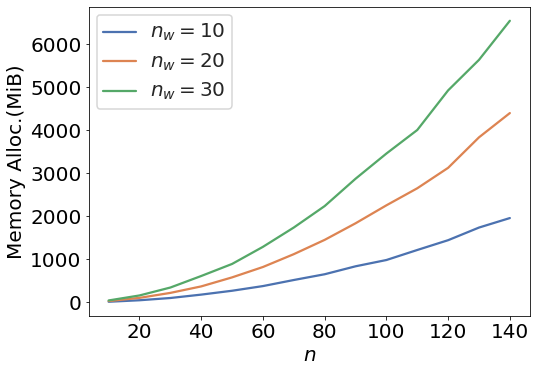

In [8]:
timePlotSNS(allMemNList,namesList,N, "Memory Alloc.(MiB)",r"$n$", path="./figures/experiment4/MemAlloc_N")

In [9]:
N = [25, 50, 100]
bins = list(range(10,30+2,2))
n_samples  = 1_000
mean = 0
std = 1

variables = (N, bins, n_samples, mean, std)

data_generator = lambda mean, std, size ,n_samples : [np.random.normal(mean, std, size) for _ in range(n_samples)]

In [10]:
def memoryAllocation_Bins(variables, data_generator):
    N, bins, n_samples, mean, std = variables
    allMemSList = list()
    for n in N:
        memList = list()
        for b in bins:
            A = np.asarray(data_generator(mean, std, n, n_samples))
            B = np.asarray(data_generator(mean, std, n, n_samples))
        
            memList.append(ppt.GreenFloatCuda_memcheck(A,B, b,return_info_dict=True)["memory_MIB"])
        
        allMemSList.append(memList)
    return allMemSList
        

In [11]:
%%capture
allMemSList = memoryAllocation_Bins(variables, data_generator)

In [12]:
nameList = [r"$n=25$", r"$n=50$", r"$n=100$"]

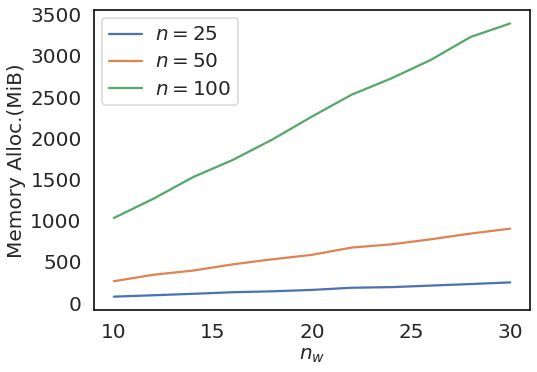

In [13]:
timePlotSNS(allMemSList,nameList,bins, "Memory Alloc.(MiB)",r"$n_{w}$", path="./figures/experiment4/MemAlloc_Bins")